In [56]:
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
import numpy as np
import pandas as pd
import html5lib
import lxml
import datetime as dt

In [57]:
# getting response and url
res = requests.get("https://cmsc320.github.io/files/top-50-solar-flares.html")
root = BeautifulSoup(res.content)
url = res.url

In [58]:
# opening html file
html = urlopen(url).read()
soup = BeautifulSoup(html, "html.parser")

# get text
text = soup.get_text()

In [59]:
soup.prettify()

'<!DOCTYPE html>\n<html class="fontawesome-i2svg-active fontawesome-i2svg-complete" lang="en">\n <head>\n  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>\n  <title>\n   Top 50 solar flares | Solar activity | SpaceWeatherLive.com\n  </title>\n  <meta charset="utf-8"/>\n  <meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="robots"/>\n  <meta content="On this page you will find an overview of the strongest solar flares since June 1996 together with links to more information in our archive and a v..." name="description"/>\n  <meta content="SpaceWeatherLive, Live, Aurora, Auroral activity, Aurora Australis, Aurora Borealis, northern lights, Solar wind, Kp-index, Space Weather, Space Weather Updates, Aurora forecast, Space Weather Alerts, Solar activity, Solar flares, Sunspots, Aurora alert, Auroral activity, The Sun, SDO, STEREO, EPAM, DSCOVR" name="keywords"/>\n  <!-- Facebook meta -->\n  <meta content="https://spaceweath

In [60]:
# getting table from html file and converting into DataFrame
table = root.find('table')
tbl = pd.read_html(str(table))
df = pd.DataFrame(tbl[0])
df.columns = ["Rank", "X_Class", "Date", "Region", "Start_Time",
              "Max_Time", "End_Time", "Movie"]

In [61]:
# dropping last column of dataframe
df = df.drop('Movie', 1)

C:\Users\jonat\AppData\Local\Temp/ipykernel_18672/1543932329.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Movie', 1)


In [62]:
# combining the date and time columns into 3 different datetime columns
for index, row in df.iterrows():
    Start_Datetime = row['Date'] + ' ' + row['Start_Time']
    Max_Datetime = row['Date'] + ' ' + row['Max_Time']
    End_Datetime = row['Date'] + ' ' + row['End_Time']
    df.at[index, 'Start_Datetime'] = dt.datetime.strptime(Start_Datetime,
                                                            '%Y/%m/%d %H:%M')
    df.at[index, 'Max_Datetime'] = dt.datetime.strptime(Max_Datetime,
                                                          '%Y/%m/%d %H:%M')
    df.at[index, 'End_Datetime'] = dt.datetime.strptime(End_Datetime,
                                                          '%Y/%m/%d %H:%M')
df = df.drop('Date', 1)
df = df.drop('Start_Time', 1)
df = df.drop('End_Time', 1)
df = df.drop('Max_Time', 1)

C:\Users\jonat\AppData\Local\Temp/ipykernel_18672/550940790.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Date', 1)
C:\Users\jonat\AppData\Local\Temp/ipykernel_18672/550940790.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Start_Time', 1)
C:\Users\jonat\AppData\Local\Temp/ipykernel_18672/550940790.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('End_Time', 1)
C:\Users\jonat\AppData\Local\Temp/ipykernel_18672/550940790.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Max_Time', 1)


In [63]:
# replacing missing values with "NaN"
df.replace(to_replace = "-", value = "NaN")

,Rank,X_Class,Region,Start_Datetime,Max_Datetime,End_Datetime
0,1,X28+,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2+,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17+,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
5,6,X10,486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
6,7,X9.4,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
7,8,X9.3,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
8,9,X9,930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
9,10,X8.3,486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


In [191]:
res2 = requests.get("https://cmsc320.github.io/files/waves_type2.html")
root2 = BeautifulSoup(res2.content)
url2 = res2.url
html2 = urlopen(url2).read()
soup2 = BeautifulSoup(html2, "html.parser")
text2 = soup2.get_text()

In [157]:
# soup2.prettify()

In [192]:
# seperate data into array of strings, where each string as a row of data
lines = text2.split('\n')
lines = lines[15:]
for i in range(0,3):
    lines.pop(len(lines) - 1)

df2 = pd.DataFrame(columns=["Start_Date", "Start_Time", "End_Date",
                            "End_Time", "Start_Freq", "End_Freq",
                            "Flare_Loc", "Flare_Region", "Flare_Class",
                            "CME_Date", "CME_Time", "CME_Angle",
                            "CME_Width", "CME_Speed"],
                   index=range(0,len(lines)))

# iterate through each line and split data
row = 0
for line in lines:
    cols = line.split(' ')
    # remove empty data
    while '' in cols:
        cols.remove('')
    col = 0
    # assigning cleaned data to dataframe
    while col < 14:
        df2.iat[row, col] = cols[col]
        col += 1
    row += 1

In [193]:
df2

,Start_Date,Start_Time,End_Date,End_Time,Start_Freq,End_Freq,Flare_Loc,Flare_Region,Flare_Class,CME_Date,CME_Time,CME_Angle,CME_Width,CME_Speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017/09/04,20:27,09/05,04:54,14000,210,S10W12,12673,M5.5,09/04,20:12,Halo,360,1418
514,2017/09/06,12:05,09/07,08:00,16000,70,S08W33,12673,X9.3,09/06,12:24,Halo,360,1571
515,2017/09/10,16:02,09/11,06:50,16000,150,S09W92,-----,X8.3,09/10,16:00,Halo,360,3163
516,2017/09/12,07:38,09/12,07:43,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252


In [194]:
# replacing missing data with 'NaN'
df2 = df2.replace('-----', 'NaN').replace('----', 'NaN').replace('--/--', 'NaN').replace('--:--', 'NaN')

# creating Halo_Flare column and replacing 'Halo' instances with 'NA'
df2['Is_Halo_Flare'] = df2['CME_Angle'].map(lambda x: x == 'Halo')
df2 = df2.replace('Halo', 'NA')

# creating Is_Width_Lower_Bound column and removing non-numeric values
df2['Is_Width_Lower_Bound'] = df2['CME_Width'].map(lambda x: str(x)[0] == '>')
df2['CME_Width'] = df2['CME_Width'].map(lambda x: x if x.isnumeric() else "")

for row in range(0, len(lines)):
    arr = df2.values[row][0].split('/')
    year = arr[0]
    df2.iat[row, 2] = year + '/' + df2.values[row][2]
    df2.iat[row, 9] = year + '/' + df2.values[row][9]

In [195]:
df2

,Start_Date,Start_Time,End_Date,End_Time,Start_Freq,End_Freq,Flare_Loc,Flare_Region,Flare_Class,CME_Date,CME_Time,CME_Angle,CME_Width,CME_Speed,Is_Halo_Flare,Is_Width_Lower_Bound
0,1997/04/01,14:00,1997/04/01,14:15,8000,4000,S25E16,8026,M1.3,1997/04/01,15:18,74,79,312,False,False
1,1997/04/07,14:30,1997/04/07,17:30,11000,1000,S28E19,8027,C6.8,1997/04/07,14:27,NA,360,878,True,False
2,1997/05/12,05:15,1997/05/14,16:00,12000,80,N21W08,8038,C1.3,1997/05/12,05:30,NA,360,464,True,False
3,1997/05/21,20:20,1997/05/21,22:00,5000,500,N05W12,8040,M1.3,1997/05/21,21:00,263,165,296,False,False
4,1997/09/23,21:53,1997/09/23,22:16,6000,2000,S29E25,8088,C1.4,1997/09/23,22:02,133,155,712,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017/09/04,20:27,2017/09/05,04:54,14000,210,S10W12,12673,M5.5,2017/09/04,20:12,NA,360,1418,True,False
514,2017/09/06,12:05,2017/09/07,08:00,16000,70,S08W33,12673,X9.3,2017/09/06,12:24,NA,360,1571,True,False
515,2017/09/10,16:02,2017/09/11,06:50,16000,150,S09W92,NaN,X8.3,2017/09/10,16:00,NA,360,3163,True,False
516,2017/09/12,07:38,2017/09/12,07:43,16000,13000,N08E48,12680,C3.0,2017/09/12,08:03,124,96,252,False,False


In [196]:
# combining Start_Date and Start_Time columns to create Start_Datetime column
for index, row in df2.iterrows():
    Start_Datetime = row['Start_Date'] + ' ' + row['Start_Time']
    df2.at[index, 'Start_Datetime'] = dt.datetime.strptime(Start_Datetime,
                                                       '%Y/%m/%d %H:%M')
df2 = df2.drop('Start_Date', 1)
df2 = df2.drop('Start_Time', 1)

C:\Users\jonat\AppData\Local\Temp/ipykernel_18672/504461090.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop('Start_Date', 1)
C:\Users\jonat\AppData\Local\Temp/ipykernel_18672/504461090.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop('Start_Time', 1)


In [197]:
# combining End_Date and End_Time columns to create End_Datetime column
for index, row in df2.iterrows():
    if (row['End_Time'] == '24:00'):
        row['End_Time'] = '00:00'
    End_Datetime = row['End_Date'] + ' ' + row['End_Time']
    df2.at[index, 'End_Datetime'] = dt.datetime.strptime(End_Datetime,
                                                       '%Y/%m/%d %H:%M')

In [198]:
# dropping the End_Date and End_Time columns
df2 = df2.drop('End_Date', 1)
df2 = df2.drop('End_Time', 1)

C:\Users\jonat\AppData\Local\Temp/ipykernel_18672/2701254822.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop('End_Date', 1)
C:\Users\jonat\AppData\Local\Temp/ipykernel_18672/2701254822.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop('End_Time', 1)


In [199]:
for index, row in df2.iterrows():
    CME_Datetime = row['CME_Date'] + ' ' + row['CME_Time']
    
    if(row['CME_Date'] == 'NaN' or row['CME_Time'] == 'NaN'):
        df2.at[index, 'CME_Datetime'] = 'NaN'
    else:
        df2.at[index, 'CME_Datetime'] = dt.datetime.strptime(CME_Datetime,
                                                        '%Y/%m/%d %H:%M')
    
df2 = df2.drop('CME_Date', 1)
df2 = df2.drop('CME_Time', 1)

C:\Users\jonat\AppData\Local\Temp/ipykernel_18672/2809422652.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop('CME_Date', 1)
C:\Users\jonat\AppData\Local\Temp/ipykernel_18672/2809422652.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop('CME_Time', 1)


In [200]:
# moving the datetime columns to front of the dataframe
cols = df2.columns.tolist()
cols = cols[-3:-1] + cols[:5] + cols[-1:] + cols[5:10]
df2 = df2[cols]

In [201]:
df2

,Start_Datetime,End_Datetime,Start_Freq,End_Freq,Flare_Loc,Flare_Region,Flare_Class,CME_Datetime,CME_Angle,CME_Width,CME_Speed,Is_Halo_Flare,Is_Width_Lower_Bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NA,360,878,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NA,360,464,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017-09-04 20:27:00,2017-09-05 04:54:00,14000,210,S10W12,12673,M5.5,2017-09-04 20:12:00,NA,360,1418,True,False
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NA,360,1571,True,False
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NA,360,3163,True,False
516,2017-09-12 07:38:00,2017-09-12 07:43:00,16000,13000,N08E48,12680,C3.0,2017-09-12 08:03:00,124,96,252,False,False


In [202]:
# sorting all solar flares into a dataframe from strongest to weakest
Top_50_Flares = df2.loc[df2['Flare_Class'].str.contains('X')]
Top_50_Flares['Flare_Class'] = Top_50_Flares['Flare_Class'].str.lstrip('X')
Top_50_Flares['Flare_Class'] = Top_50_Flares.Flare_Class.astype(float)
Top_50_Flares = Top_50_Flares.sort_values('Flare_Class', ascending = False)
Top_50_Flare = Top_50_Flares.head(50)
Top_50_Flares['Flare_Class'] = Top_50_Flares.Flare_Class.astype(str)
Top_50_Flares['Flare_Class'] = "X" + Top_50_Flares['Flare_Class']

# getting top 50 flares
Top_50_Flares = Top_50_Flares[:50]
Top_50_Flares

C:\Users\jonat\AppData\Local\Temp/ipykernel_18672/4160413641.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_50_Flares['Flare_Class'] = Top_50_Flares['Flare_Class'].str.lstrip('X')
C:\Users\jonat\AppData\Local\Temp/ipykernel_18672/4160413641.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_50_Flares['Flare_Class'] = Top_50_Flares.Flare_Class.astype(float)


,Start_Datetime,End_Datetime,Start_Freq,End_Freq,Flare_Loc,Flare_Region,Flare_Class,CME_Datetime,CME_Angle,CME_Width,CME_Speed,Is_Halo_Flare,Is_Width_Lower_Bound
240,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,10486,X28.0,2003-11-04 19:54:00,NA,360,2657,True,False
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.0,2001-04-02 22:06:00,261,244,2505,False,False
233,2003-10-28 11:10:00,2003-10-29 00:00:00,14000,40,S16E08,10486,X17.0,2003-10-28 11:30:00,NA,360,2459,True,False
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.0,2001-04-15 14:06:00,245,167,1199,False,False
234,2003-10-29 20:55:00,2003-10-29 00:00:00,11000,500,S15W02,10486,X10.0,2003-10-29 20:54:00,NA,360,2029,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NA,360,1556,True,False
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NA,360,1571,True,False
328,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,,NaN,False,False
237,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NA,360,2598,True,False
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NA,360,3163,True,False


I can replicate the NASA data pretty well in terms of sructure and display of the data. However, some of the data from the mirror is not exactly the same as the Top 50 Solar Flares that NASA has on their site.

In [217]:
# getting both solar flare tables (SWL and NASA)
SWL_tbl = df
NASA_tbl = df2

# adding SWL Rank column to the NASA dataframe
NASA_tbl['SWL Rank'] = pd.Series('NaN', index=NASA_tbl.index)

# function that determines the rank of the flare from the NASA data
def find_rank(index):
    for i, row in SWL_tbl.iterrows():
        if NASA_tbl.iat[index, 6] == row[1] and NASA_tbl.iat[index, 5] == row[2]:
            return row['Rank']
    return 'NaN'

# iterate through the NASA data to find the SWL rank for each flare
for index, row in NASA_tbl.iterrows():
    NASA_tbl.iat[index, 13] = find_rank(index)
    
NASA_tbl

,Start_Datetime,End_Datetime,Start_Freq,End_Freq,Flare_Loc,Flare_Region,Flare_Class,CME_Datetime,CME_Angle,CME_Width,CME_Speed,Is_Halo_Flare,Is_Width_Lower_Bound,SWL Rank
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False,False,NaN
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NA,360,878,True,False,NaN
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NA,360,464,True,False,NaN
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False,NaN
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017-09-04 20:27:00,2017-09-05 04:54:00,14000,210,S10W12,12673,M5.5,2017-09-04 20:12:00,NA,360,1418,True,False,NaN
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NA,360,1571,True,False,NaN
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NA,360,3163,True,False,NaN
516,2017-09-12 07:38:00,2017-09-12 07:43:00,16000,13000,N08E48,12680,C3.0,2017-09-12 08:03:00,124,96,252,False,False,NaN


I defined best matching rows by comparing two things: a solar flares clasification and their region. I figured that by using those to criteria, since they appear as columns on both the NASA datafram and the SWL Top 50 Solar Flares dataframe. On top of that, logically, if two flares have the same classification and region, then they are probably the "best matching". 

In [203]:
import matplotlib.pyplot as plt
import numpy as np

In [206]:
Halo_Count_Top = 0
Halo_False_Top = 0
Halo_Count_Nasa = 0
Halo_False_Nasa = 0

# get count of halo flares from all flare data and from top 50 flares
for index, row in Top_50_Flares.iterrows():
    if row['Is_Halo_Flare']:
        Halo_Count_Top += 1
    else:
        Halo_False_Top += 1
        
for index, row in df2.iterrows():
    if row['Is_Halo_Flare']:
        Halo_Count_Nasa += 1
    else:
        Halo_False_Nasa += 1

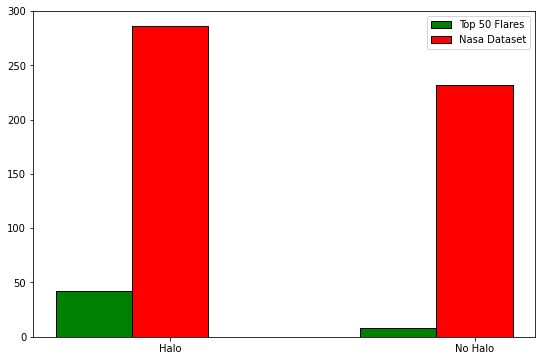

In [214]:
bar_width = 0.25
fig = plt.subplots(figsize=(9,6))

Top_50 = [Halo_Count_Top, Halo_False_Top]
Nasa_Data = [Halo_Count_Nasa, Halo_False_Nasa]

bar1 = np.arange(2)
bar2 = [x + bar_width for x in bar1]

plt.bar(bar1, Top_50, color='g', width=bar_width, edgecolor='black', label='Top 50 Flares')
plt.bar(bar2, Nasa_Data, color='r', width=bar_width, edgecolor='black', label='Nasa Dataset')
plt.xticks([x + bar_width for x in range(2)], ['Halo', 'No Halo'])

plt.legend()
plt.show()